In [0]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import imageio

Cluster centers:
 [[186.4466148  143.05470949 171.96741709]
 [228.51979153 229.83751131 218.10244648]
 [129.55139186  60.93887019 103.27154074]
 [122.25737828  92.9805618  145.68775281]
 [217.45564107 197.25353095 204.06387432]
 [209.91918559 169.60266079 185.42299683]
 [ 66.44445695  35.55717501  84.39499156]
 [180.24775769  96.4107537  130.63371683]
 [153.31771366 119.93441784 162.05961394]
 [ 84.01976325  63.05743695 125.35573855]]
w:  600
h:  600
d:  3


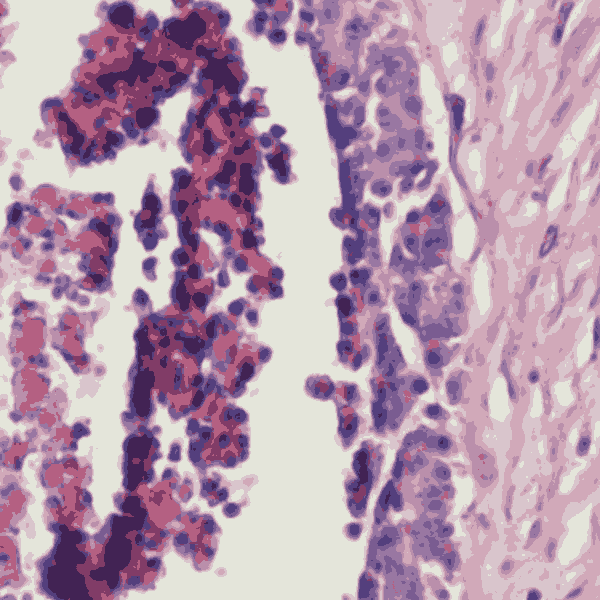

In [0]:
img = imageio.imread('data/image.jpg')

w, h, d = tuple(img.shape)

image_array = np.reshape(img, (w*h, d))

def generate_image(clusterCenters, label, w, h):
  d = clusterCenters.shape[1]
  image = np.zeros((w, h, d))
  label_index = 0
  for i in range(w):
    for j in range(h):
      image[i][j] = clusterCenters[int(label[int(label_index)])]
      label_index += 1
  
  return image

# Generate K-Means algorithmn object
kMeans = KMeans(n_clusters = 10)
kMeans.fit(image_array)
labels = kMeans.predict(image_array)

print("Cluster centers:\n", kMeans.cluster_centers_)
print("w: ", w)
print("h: ", h)
print("d: ", d)

Image.fromarray(generate_image(kMeans.cluster_centers_,
                               labels, w, h).astype('uint8'))  

**Agglomerative clustering**

In [0]:
from sklearn.cluster import AgglomerativeClustering

kMeans = KMeans(n_clusters = 50,
                random_state = 3)
kMeans.fit(image_array)
kMeansCenters = kMeans.cluster_centers_
kMeansPredict = kMeans.predict(image_array)

agglomerativeClusterCenters = 2
agglomerative = AgglomerativeClustering(n_clusters = agglomerativeClusterCenters,
                                  linkage = 'single')
agglomerative.fit(kMeansCenters)
agglomerative_labels = agglomerative.fit_predict(kMeansCenters)

Single agglomerative cluster centers:
 [[183.37392892 154.84965588 175.08355999]
 [ 45.04568189  23.53684562  63.23874625]]


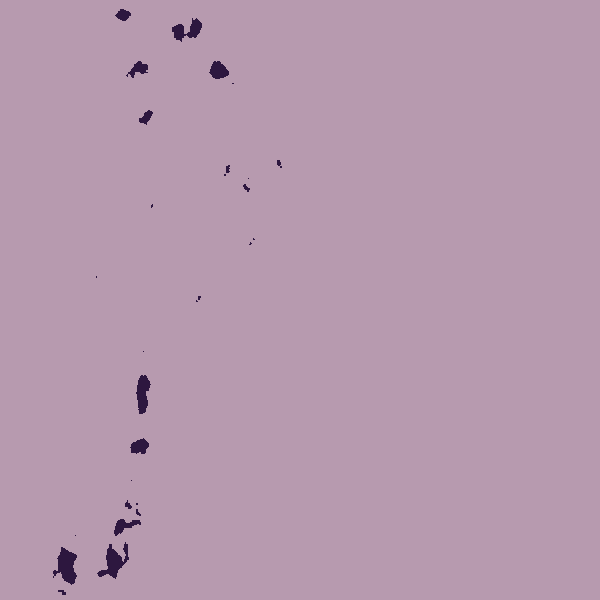

In [0]:
# finding labels
real_labels = np.zeros((w*h))
for j in range(agglomerativeClusterCenters):
  kMeans = np.where(agglomerative_labels == j)[0]

  for k in range(len(kMeans)):
    real_labels[np.where(kMeansPredict == kMeans[k])] = j

# finding centers
centers = np.zeros((agglomerativeClusterCenters, 3))
for i in range(agglomerativeClusterCenters):
  centers[i,:] = np.mean(image_array[np.where(real_labels == i)],
                         axis = 0)
  
print("Single agglomerative cluster centers:\n",centers)

Image.fromarray(generate_image(centers,
                               real_labels, w, h).astype('uint8'))

Complete agglomerative cluster centers:
 [[155.29422728 105.41534702 146.96984658]
 [196.30266814 155.06918542 178.09263811]
 [103.27436484  62.68602047 115.53738712]
 [223.79382865 213.82780318 210.55399141]
 [ 59.51426659  36.88501551  89.6759141 ]]


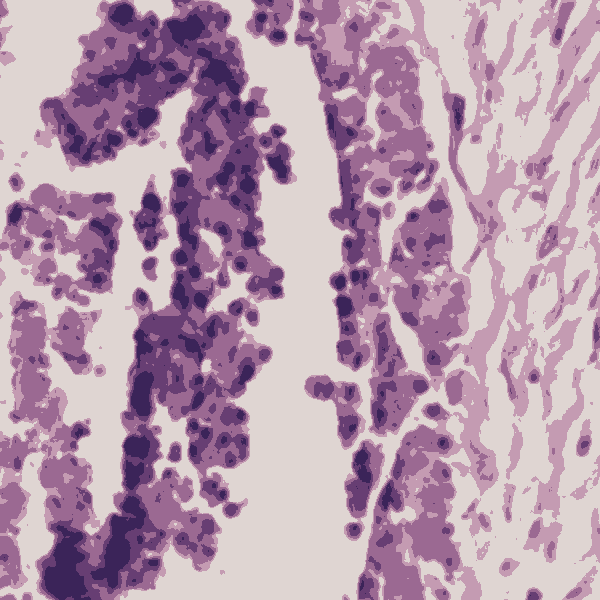

In [0]:
# complete
agglomerativeClusterCenters = 5
agglomerative = AgglomerativeClustering(n_clusters = agglomerativeClusterCenters,
                                        linkage = 'complete')
agglomerative.fit(kMeansCenters)
agglomerative_labels = agglomerative.fit_predict(kMeansCenters)

# finding labels
real_labels = np.zeros((w*h))
for j in range(agglomerativeClusterCenters):
  kMeans = np.where(agglomerative_labels == j)[0]
  
  for k in range(len(kMeans)):
    real_labels[np.where(kMeansPredict == kMeans[k])] = j

# finding centers
centers = np.zeros((agglomerativeClusterCenters, 3))
for i in range(agglomerativeClusterCenters):
  centers[i,:] = np.mean(image_array[np.where(real_labels == i)],
                         axis = 0)  

print("Complete agglomerative cluster centers:\n", centers)

Image.fromarray(generate_image(centers, real_labels, w, h).astype('uint8'))

**Spectral clustering**

In [0]:
from sklearn.cluster import SpectralClustering

spectralCluster = 5
spectral = SpectralClustering(spectralCluster,
                              assign_labels = 'discretize',
                              random_state = 3)
spectral.fit(kMeansCenters)
spectralPredict = spectral.labels_

# finding labels
real_labels = np.zeros((w*h))
for j in range(len(np.unique(spectralPredict))):
    kMeans = np.where(spectralPredict == j)[0]
    for k in range(len(kMeans)):
        real_labels[np.where(kMeansPredict == kMeans[k])] = j

# finding centers
spectralCenters = np.zeros((len(np.unique(spectralPredict)), 3))
for i in range(len(np.unique(spectralPredict))):
  spectralCenters[i,:] = np.mean(image_array[np.where(real_labels == j)],
                                 axis = 0)

Image.fromarray(generate_image(spectralCenters,
                               real_labels, w, h).astype('uint8'))